# Correlation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
#Load Training data 
eng_train = pd.read_csv('E:\Preet\Internship Raj Vijtech\Aircraft data & analysis\CSV data files\Train_data_csv.csv')

In [58]:
#Load Test data 
eng_test = pd.read_csv('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\Test_data.csv')

In [59]:
#Load RUL data 
eng_RUL = pd.read_csv('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\RUL_data.csv')

In [60]:
eng_train.head()

,Unit No.,Time in Cycles,Op.Setting 1,Op.Setting 2,Op.Setting 3,S1,S2,S3,S4,S5,...,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


# Correlation on Raw Data

In [ ]:
#Group the data and drop unnecessary columns
eng_train = eng_train.groupby('Unit No.').head(10)
eng_train = eng_train.drop(['Unit No.'], axis = 1)
eng_train = eng_train.drop(['Time in Cycles'], axis = 1)
eng_train = eng_train.astype(float)

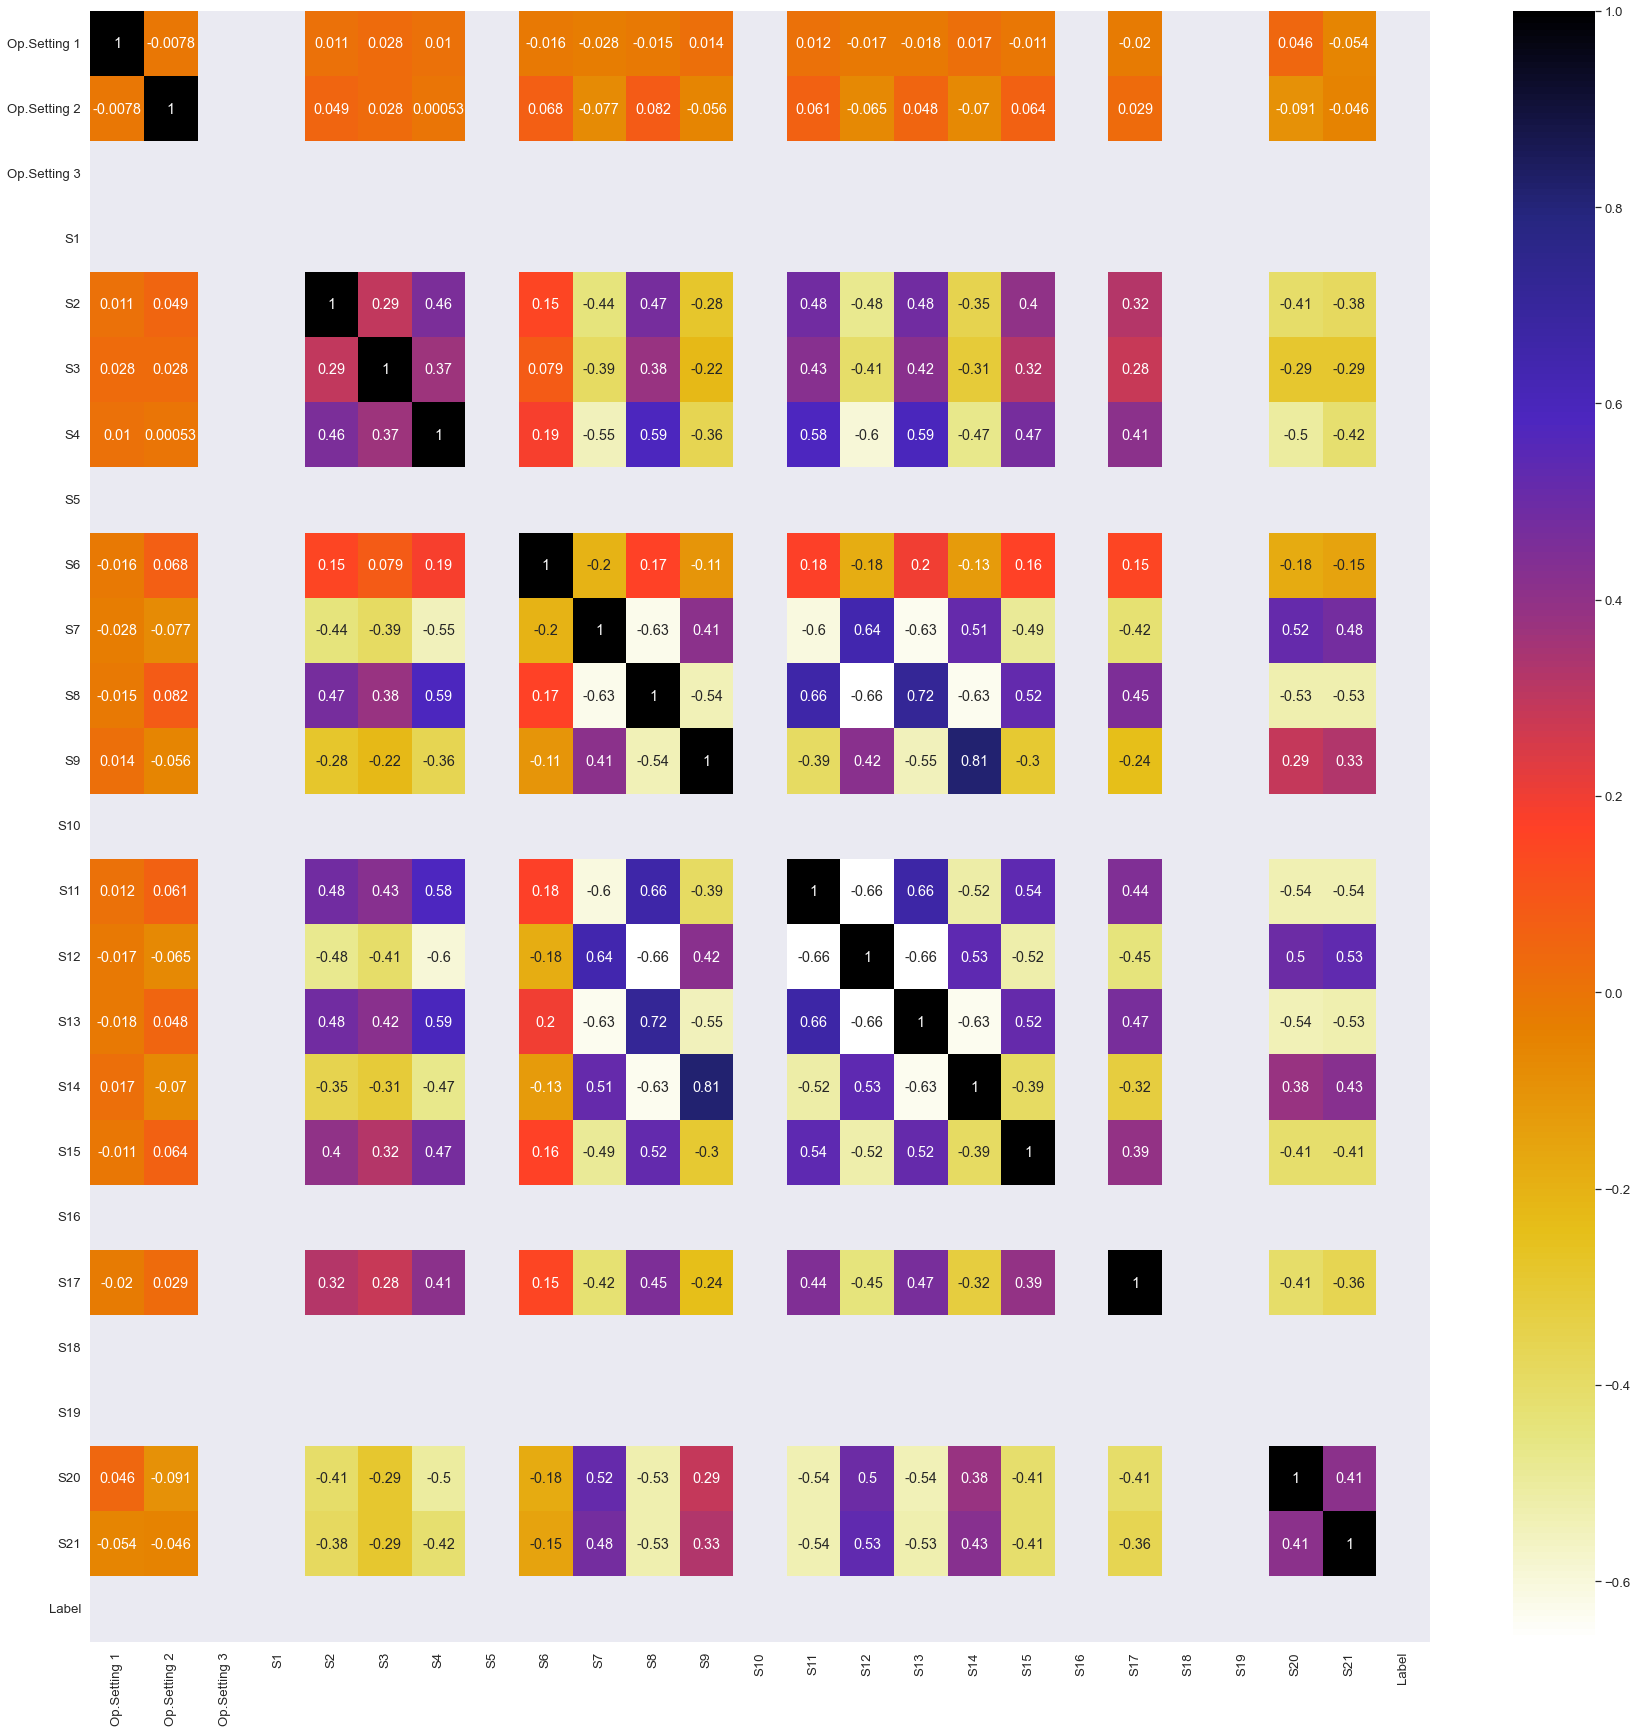

In [8]:
cor2 = eng_train.corr()                  #apply corr() to get the correlation b/w features
cor2.to_excel('Top_5_corr.xlsx')
plt.figure(figsize=(30,30))
sns.heatmap(cor2, annot = True, cmap=plt.cm.CMRmap_r)    #Get the heatmap of correlation matrix
sns.set(font_scale=1.5)                     

In [9]:
#Define a function to get the Sensors which are having correlation greater than defined threshold

def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(eng_train,0.8)
corr_features

{'S14'}

In [16]:
len(set(corr_features))

1

In [42]:
x_train = x_train.drop(corr_features, axis = 1)        #drop highly correlated features 

# Correlation test on Aggregated Data

### Standard Deviation of aggregated data

In [65]:
#Std dev of last 10 samples
stdev_Last10 = pd.read_excel('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\Mean_Std-dev.xlsx', sheet_name = 'Std_Dev_last10')
stdev_Last10.rename(columns=stdev_Last10.iloc[0], inplace = True)
stdev_Last10.drop([0], inplace = True)

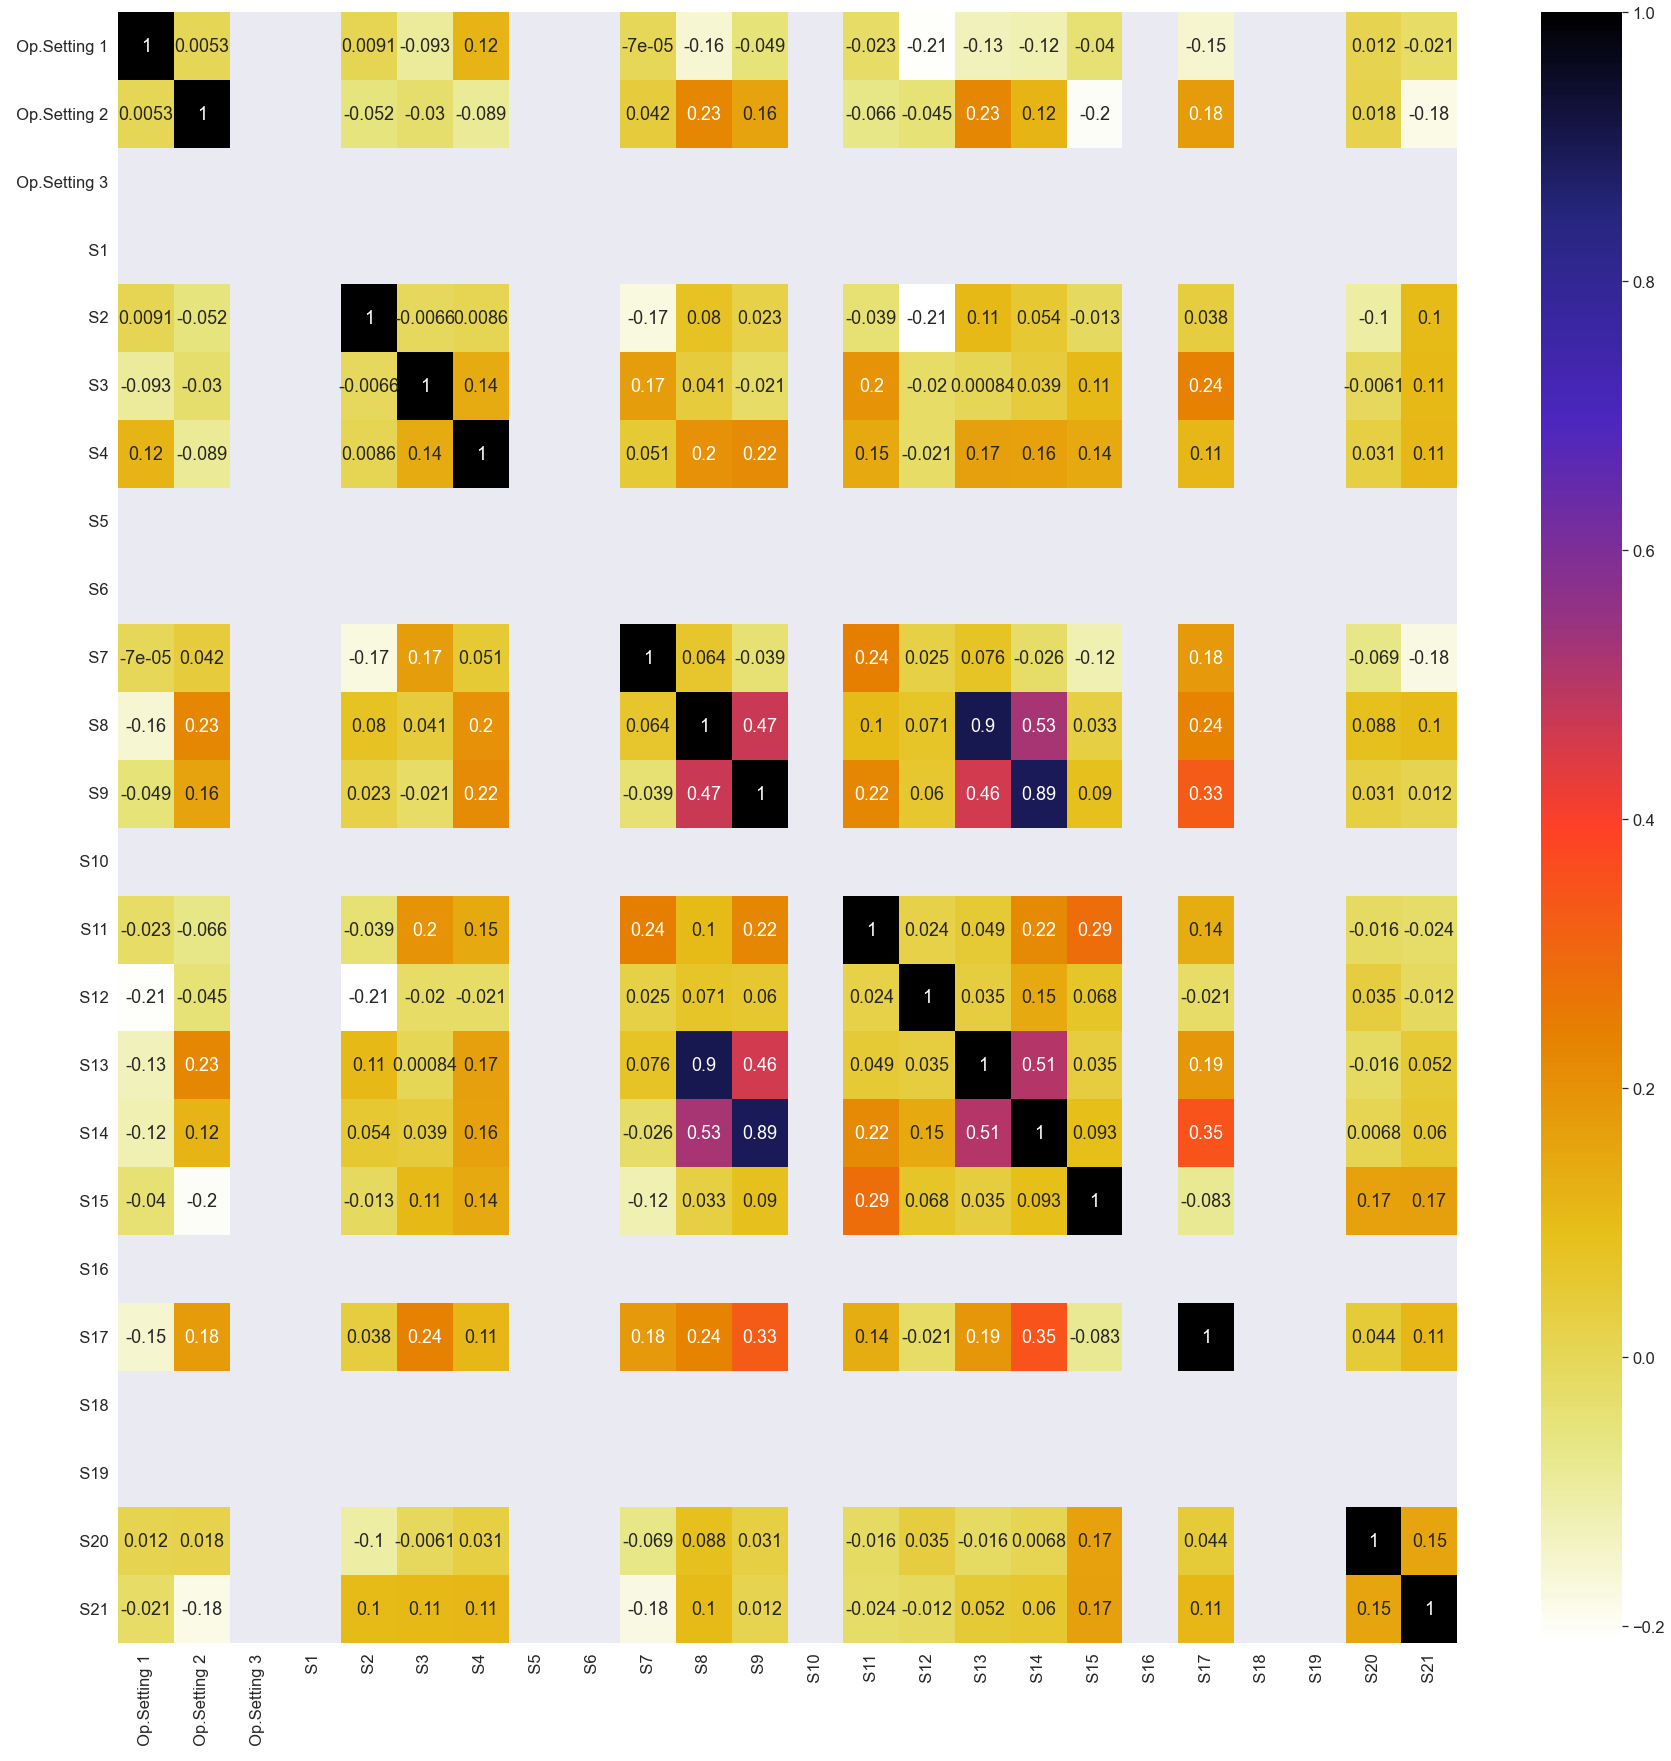

In [68]:
stdev_Last10 = stdev_Last10.drop(['Unit No.'], axis = 1)
stdev_Last10 = stdev_Last10.astype(float)
cor3 = stdev_Last10.corr()
cor3.to_excel('Stedev_10_Corr.xlsx')
plt.figure(figsize=(30,30))
sns.heatmap(cor3, annot = True, cmap=plt.cm.CMRmap_r)
sns.set(font_scale=1.5)

In [72]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(stdev_Last10,0.4)

In [81]:
corr_features

{'  S13', '  S14', '  S9'}

In [ ]:
#Std dev of LAst 5 samples 
stdev_Last5 = pd.read_excel('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\Mean_Std-dev.xlsx', sheet_name = 'Std_Dev_last5')
stdev_Last5.rename(columns=stdev_Last5.iloc[0], inplace = True)
stdev_Last5.drop([0], inplace = True)

In [ ]:
stdev_Last5 = stdev_Last5.drop(['Unit No.'], axis = 1)
stdev_Last5 = stdev_Last5.astype(float)
cor4 = stdev_Last5.corr()
cor4.to_excel('Stedev_5_Corr.xlsx')
plt.figure(figsize=(30,30))
sns.heatmap(cor4, annot = True, cmap=plt.cm.CMRmap_r)
sns.set(font_scale=1.5)

### Mean of aggregated data

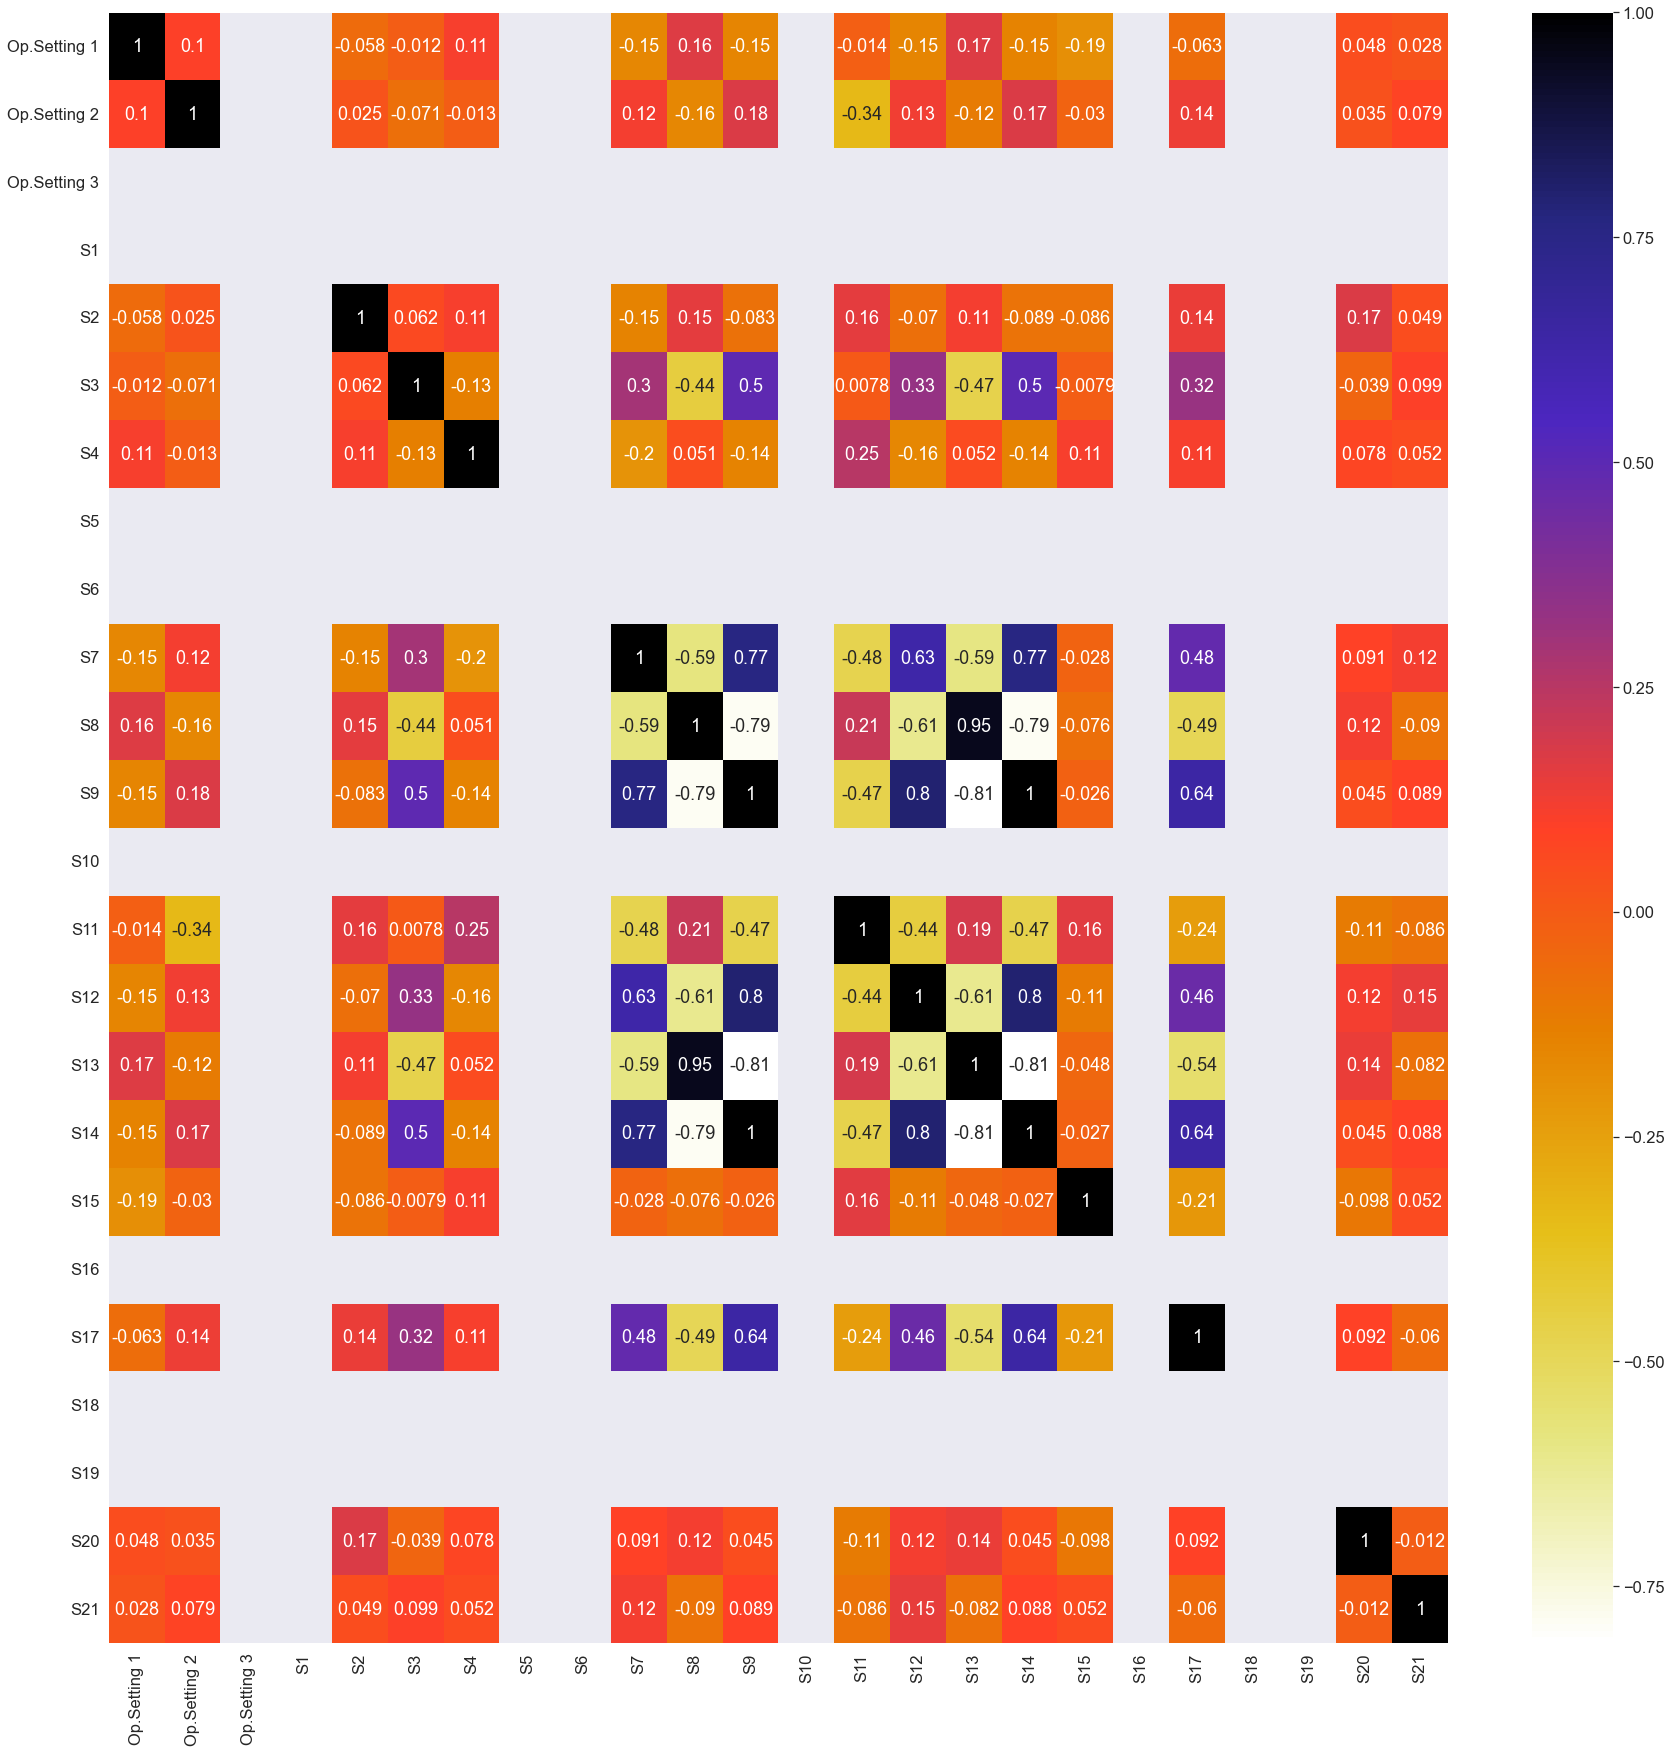

In [82]:
#Mean of Last 5 samples
mean_Last5 = pd.read_excel('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\Mean_Std-dev.xlsx', sheet_name = 'Mean_Last5')
mean_Last5.rename(columns=mean_Last5.iloc[0], inplace = True)
mean_Last5.drop([0], inplace = True)
mean_Last5 = mean_Last5.drop(['Unit No.'], axis = 1)
mean_Last5 = mean_Last5.astype(float)
cor2 = mean_Last5.corr()
cor2.to_excel('Mean_5_Correlation.xlsx')
plt.figure(figsize=(30,30))
sns.heatmap(cor2, annot = True, cmap=plt.cm.CMRmap_r)
sns.set(font_scale=2)

In [88]:
corr_features = correlation(mean_Last5,0.7)

In [89]:
corr_features

{'S12', 'S13', 'S14', 'S9'}

### Mean of complete data

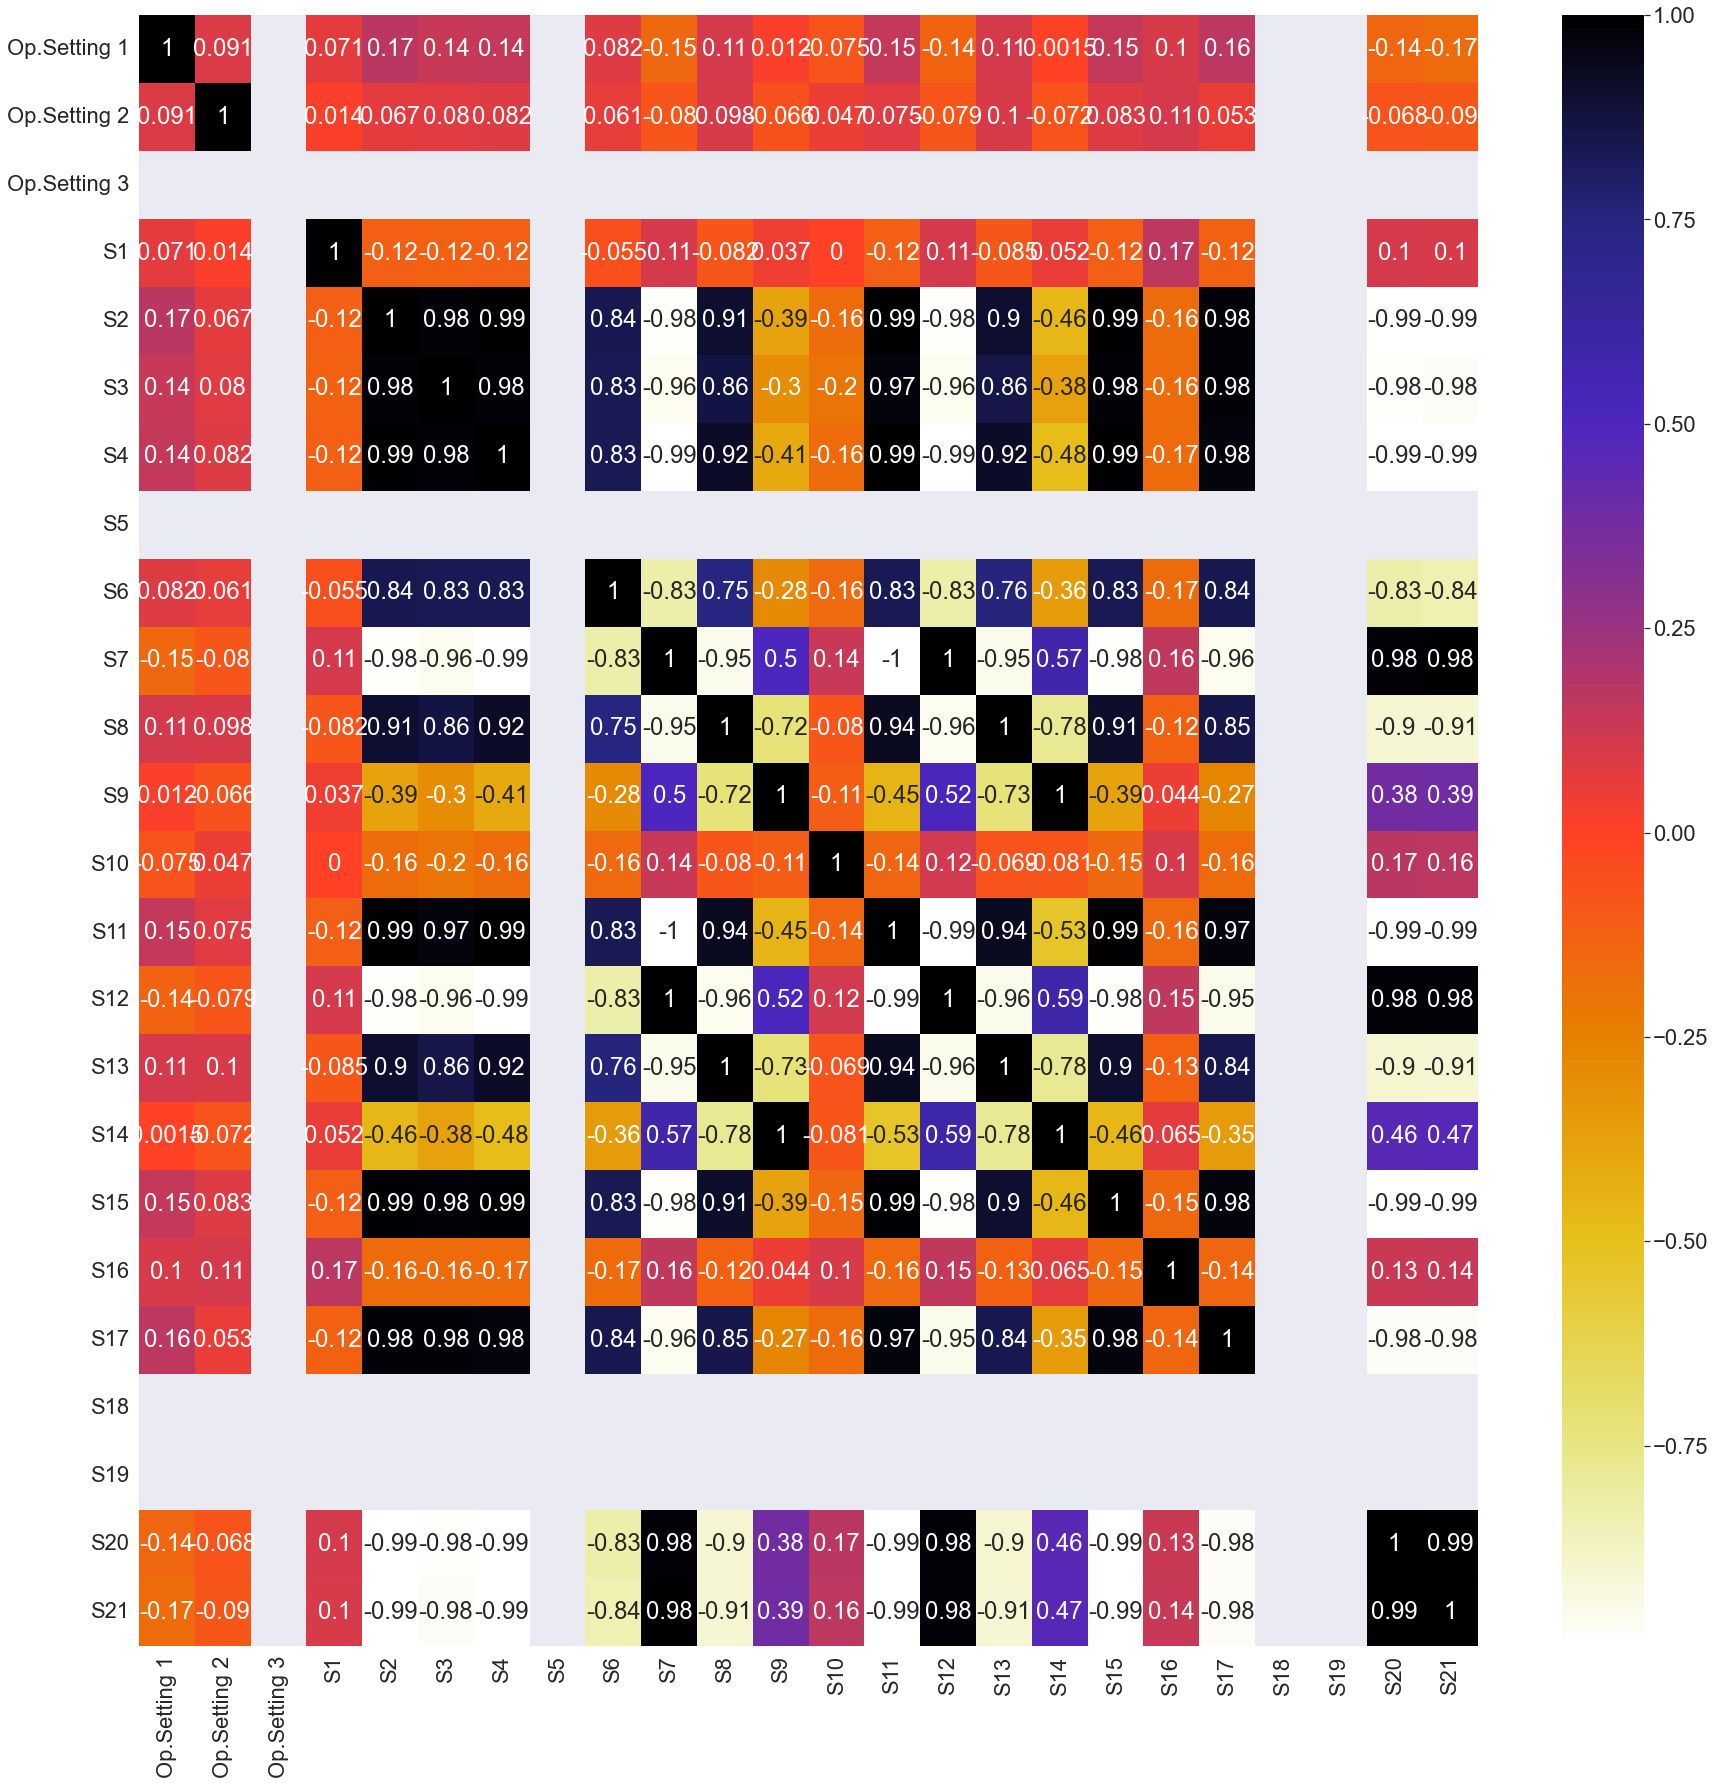

In [90]:

meanall = pd.read_excel('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\Mean_Std-dev.xlsx', sheet_name = 'Mean_all')
meanall.rename(columns=meanall.iloc[0], inplace = True)
meanall.drop([0], inplace = True)
meanall = meanall.drop(['Unit No.'], axis = 1)
meanall = meanall.astype(float)
cor1 = meanall.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor1, annot = True, cmap=plt.cm.CMRmap_r)
sns.set(font_scale=1.5)

In [96]:
corr_features = correlation(meanall,0.85)

### Std Deviation of complete data

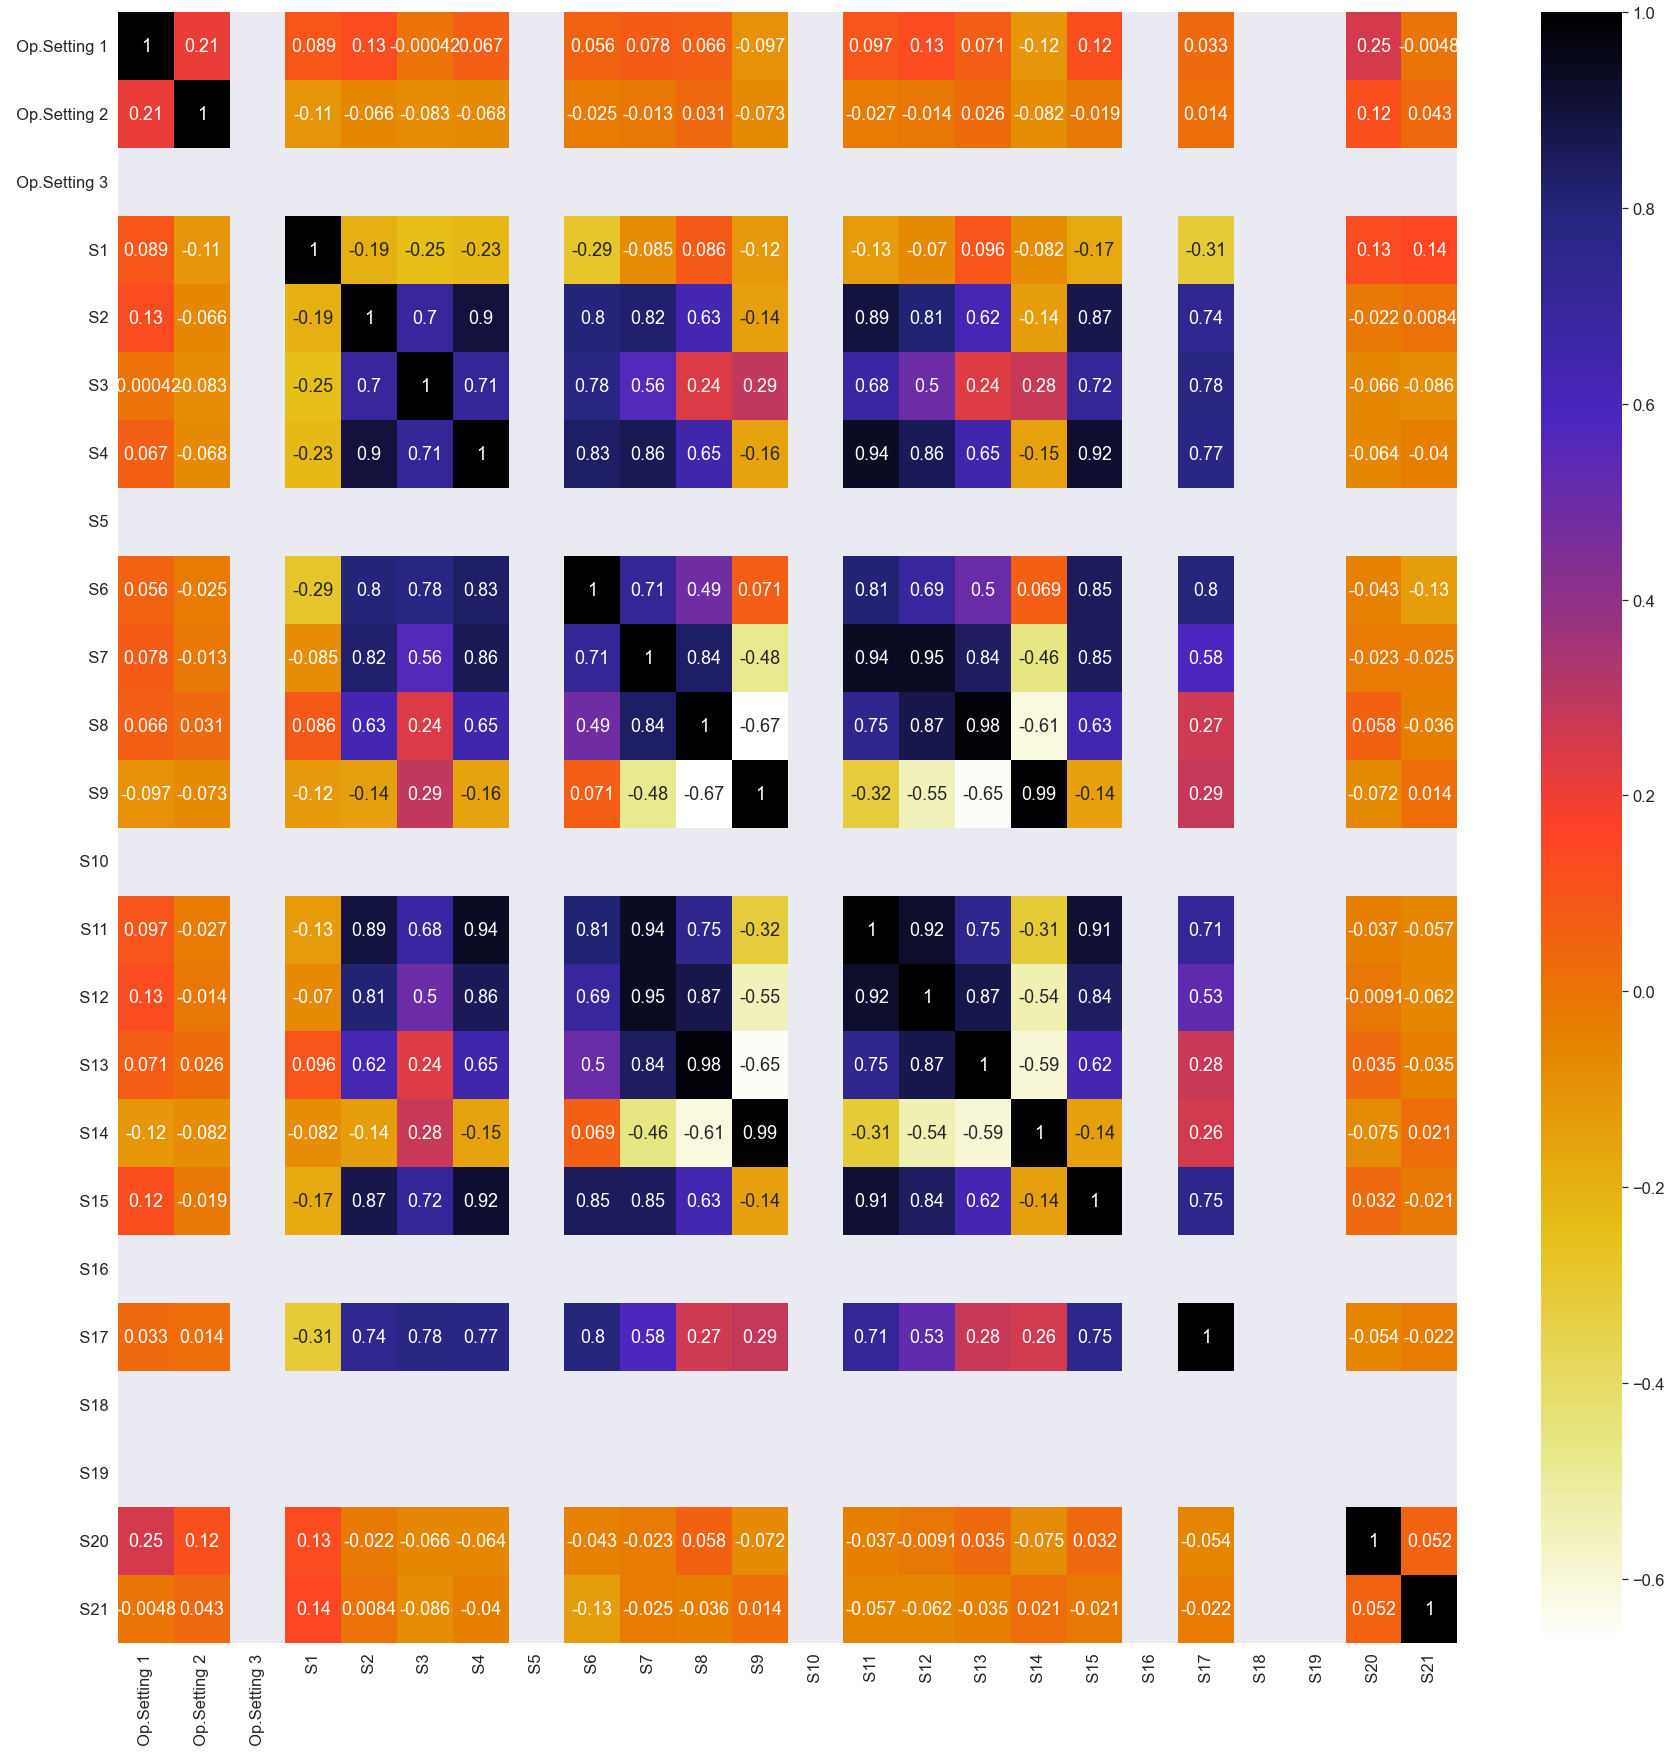

In [104]:
stdev_all = pd.read_excel('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\Mean_Std-dev.xlsx', sheet_name = 'Std_Dev_all')
stdev_all.rename(columns=stdev_all.iloc[0], inplace = True)
stdev_all.drop([0], inplace = True)
stdev_all = stdev_all.drop(['Unit No.'], axis = 1)
stdev_all = stdev_all.astype(float)
cor4 = stdev_all.corr()
cor4.to_excel('Stedev_all_Corr.xlsx')
plt.figure(figsize=(30,30))
sns.heatmap(cor4, annot = True, cmap=plt.cm.CMRmap_r)
sns.set(font_scale=1.5)

In [109]:
corr_features = correlation(stdev_all,0.70)

In [110]:
corr_features

{'  S11',
 '  S12',
 '  S13',
 '  S14',
 '  S15',
 '  S17',
 '  S4',
 '  S6',
 '  S7',
 '  S8'}

In [116]:
corr_features = correlation(stdev_Last5,0.50)

In [117]:
corr_features

{'  S13', '  S14', '  S9'}

### For top 5 samples

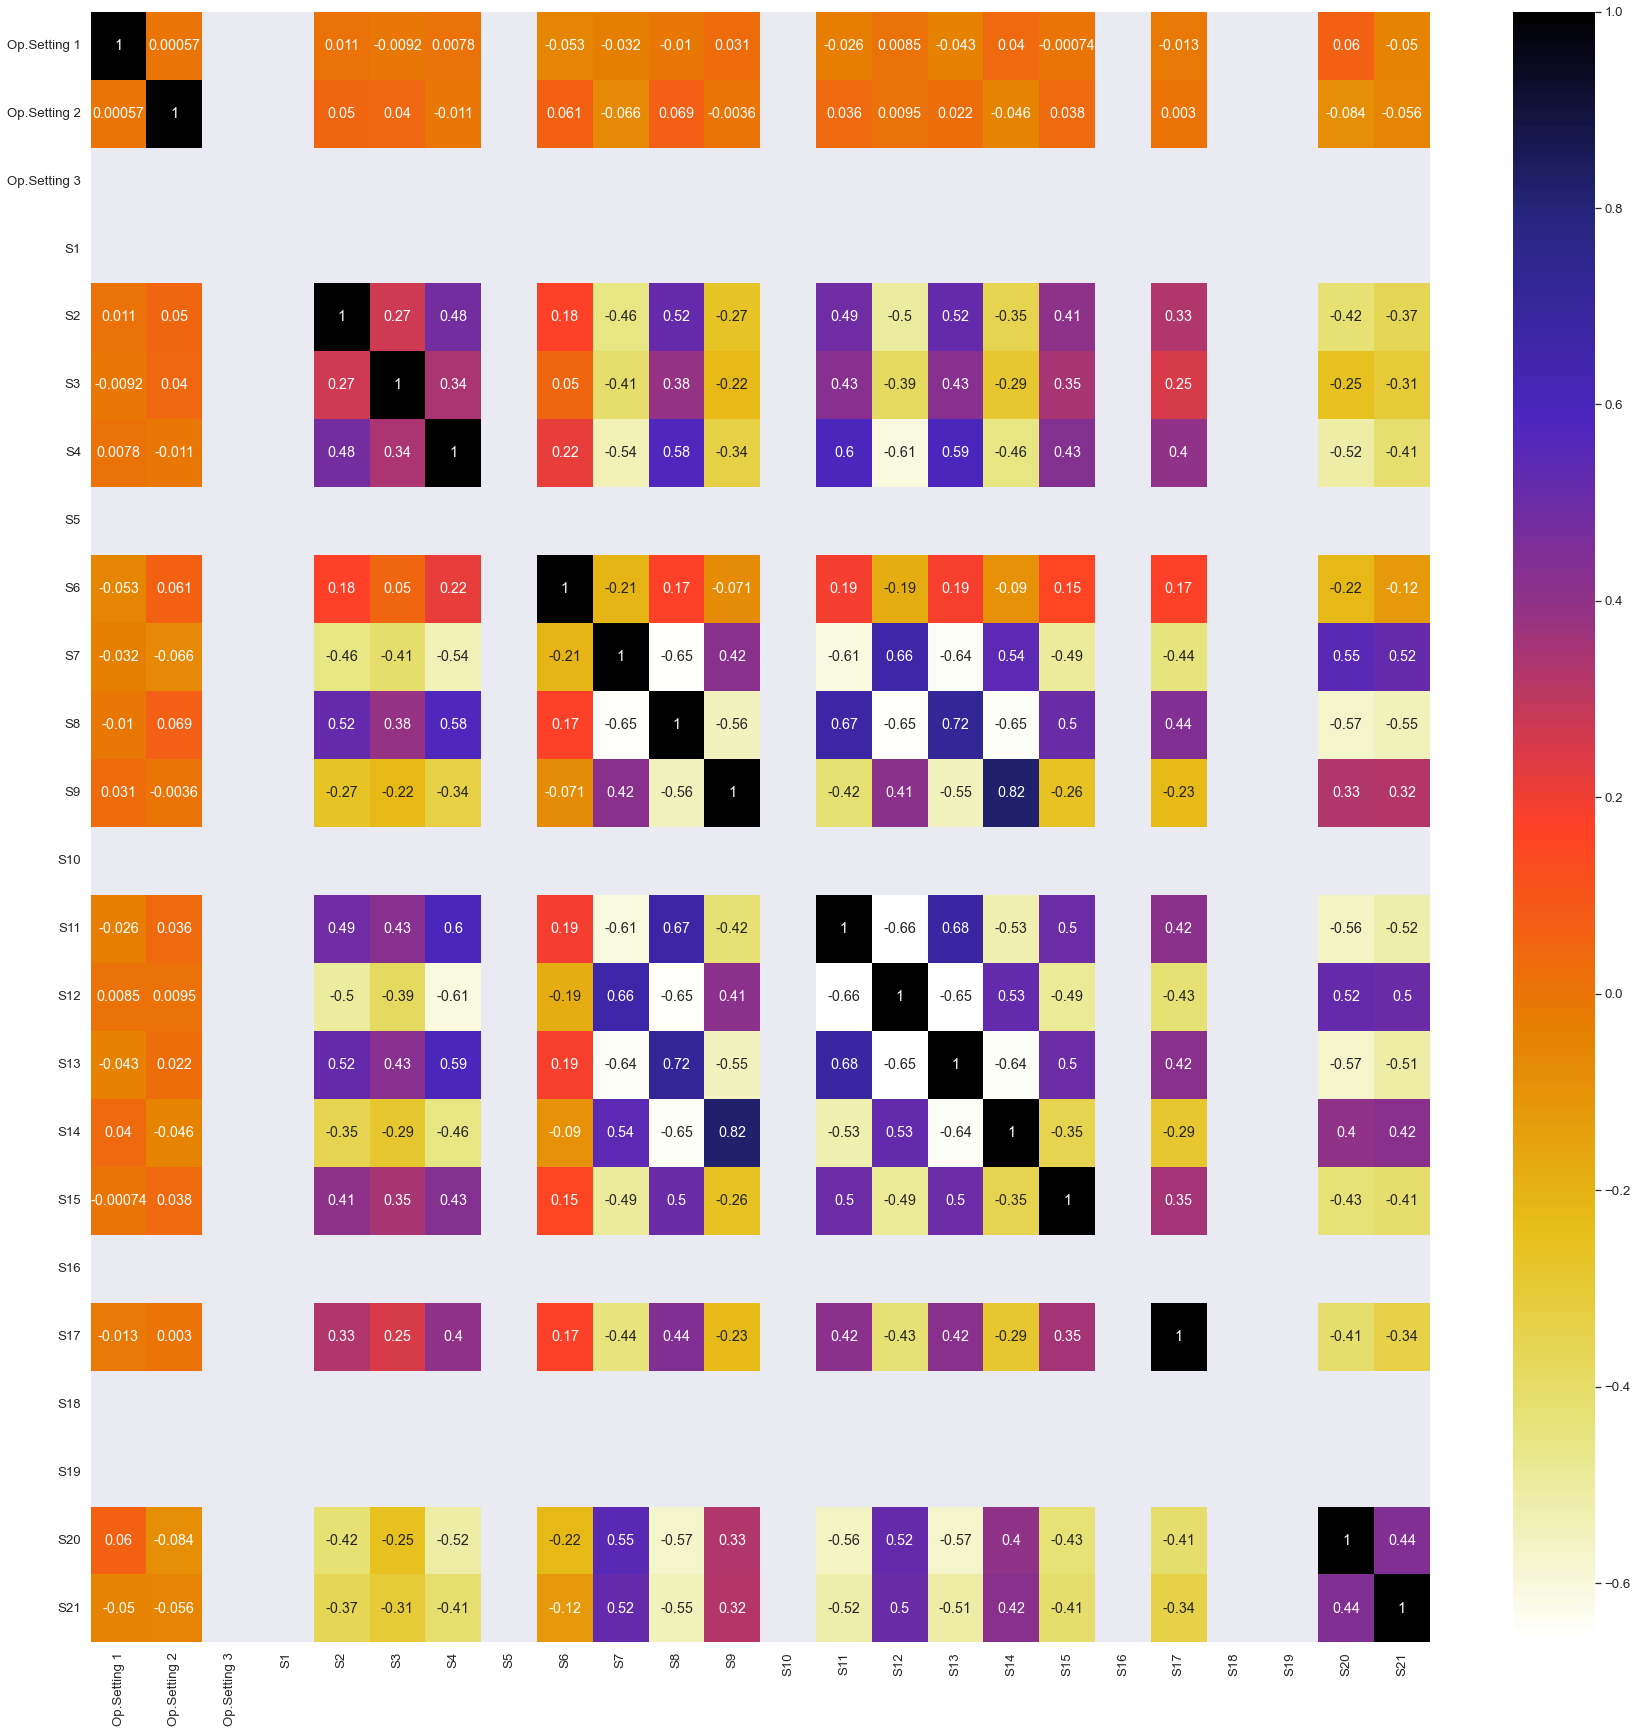

In [22]:
eng_train = pd.read_csv('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\CSV data files\Train_data_csv.csv')
eng_train = eng_train.groupby('Unit No.').head(5)
eng_train = eng_train.drop(['Unit No.'], axis = 1)
eng_train = eng_train.drop(['Time in Cycles'], axis = 1)
eng_train = eng_train.astype(float)
cor2 = eng_train.corr()
cor2.to_excel('Top_5_corr.xlsx')
plt.figure(figsize=(30,30))
sns.heatmap(cor2, annot = True, cmap=plt.cm.CMRmap_r)
sns.set(font_scale=1.2)

### For top 10 samples

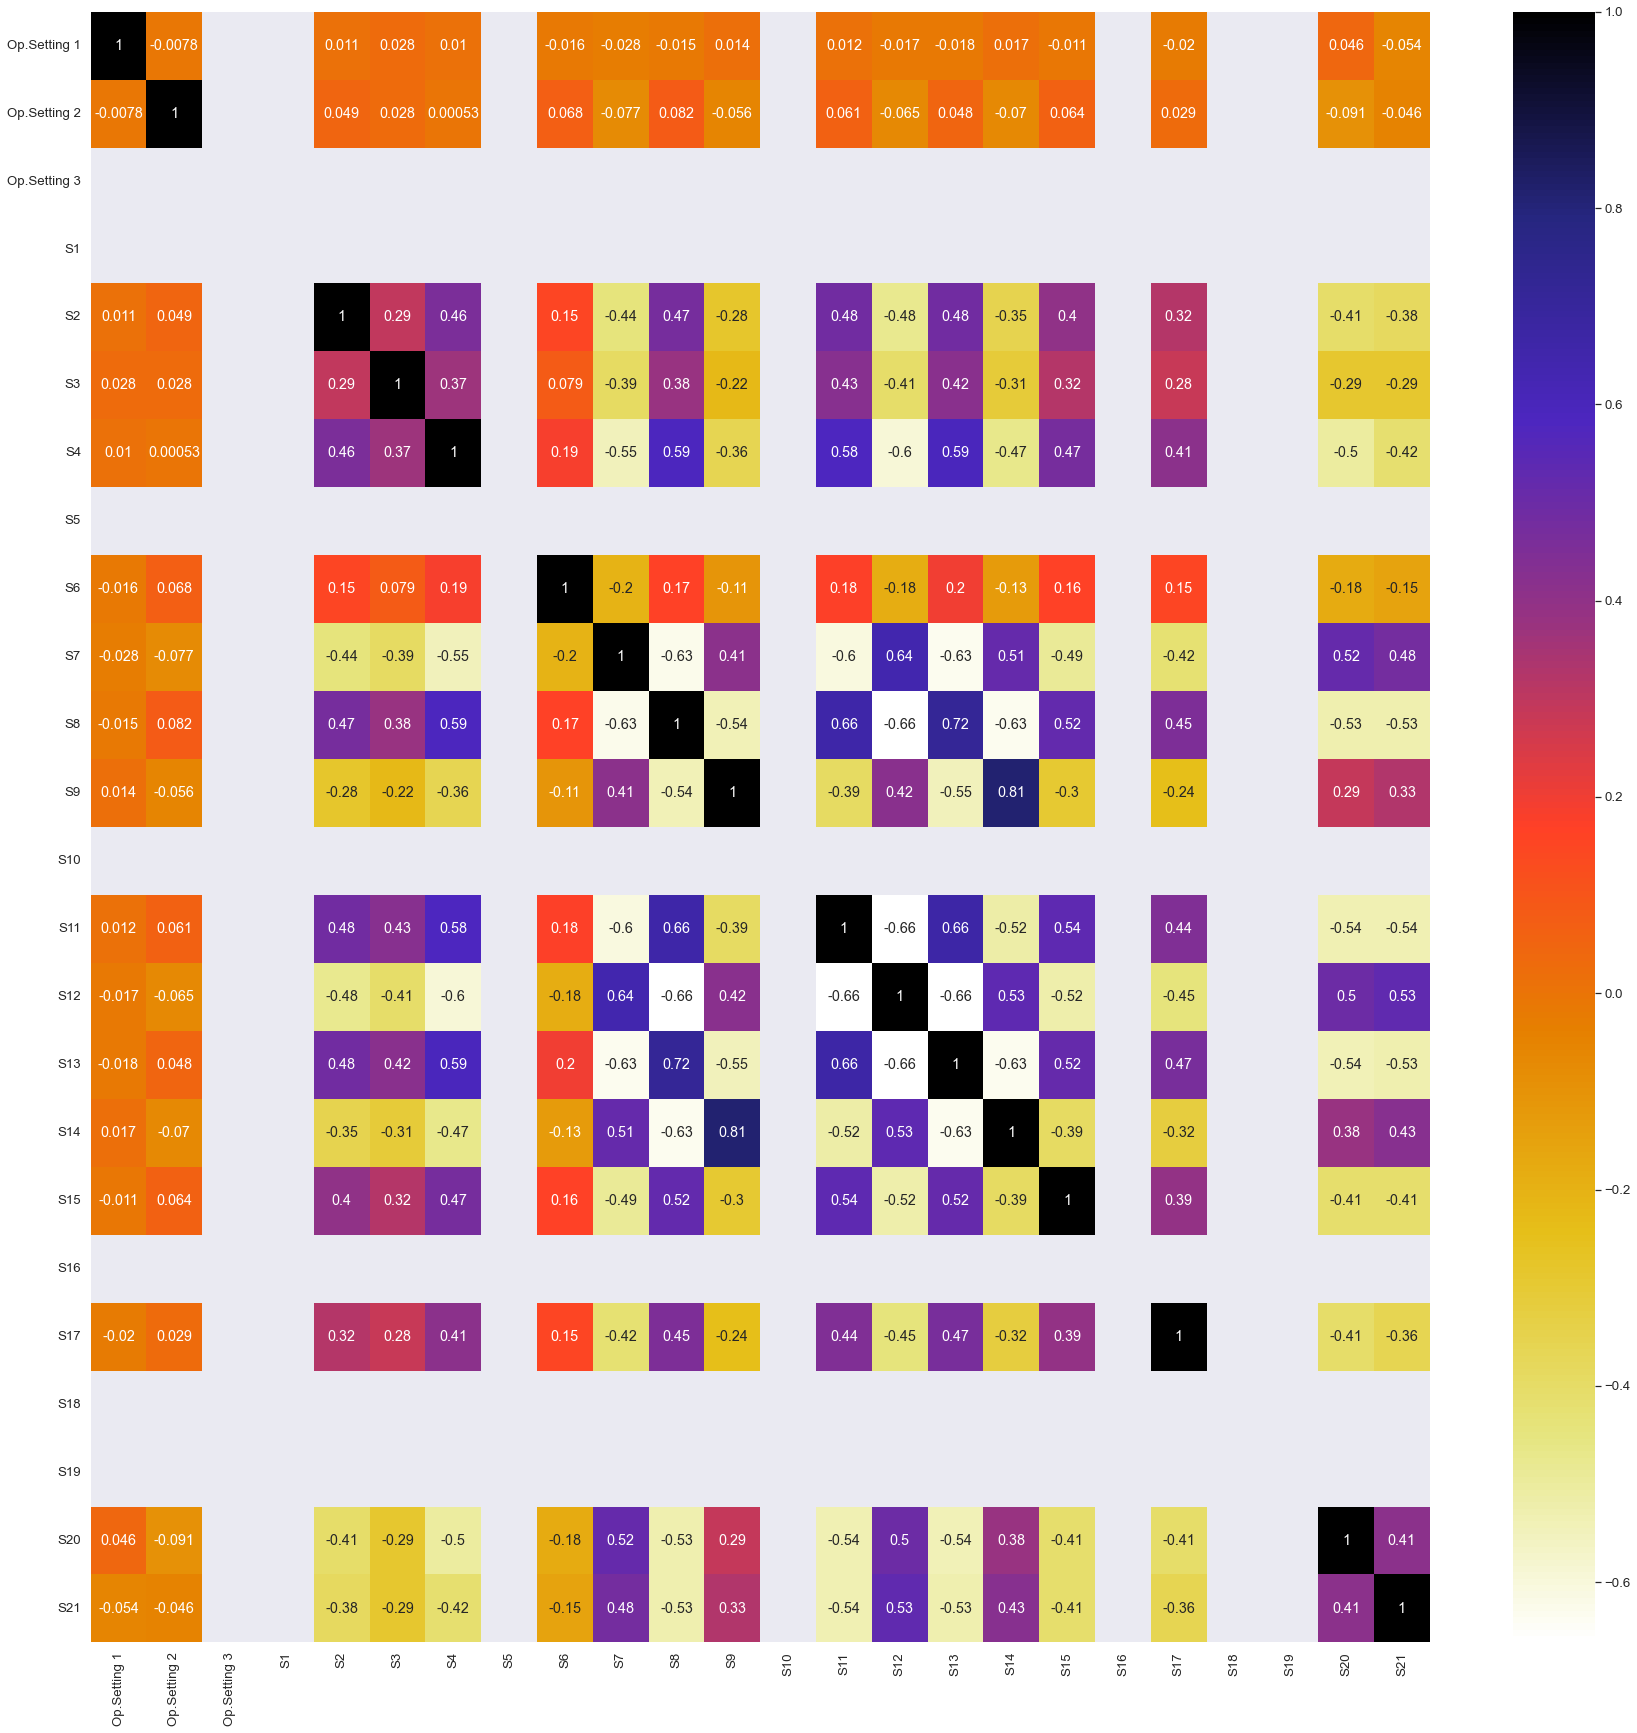

In [5]:
eng_train = pd.read_csv('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\CSV data files\Train_data_csv.csv')
eng_train = eng_train.groupby('Unit No.').head(10)
eng_train = eng_train.drop(['Unit No.'], axis = 1)
eng_train = eng_train.drop(['Time in Cycles'], axis = 1)
eng_train = eng_train.astype(float)
cor2 = eng_train.corr()
cor2.to_excel('Top_5_corr.xlsx')
plt.figure(figsize=(30,30))
sns.heatmap(cor2, annot = True, cmap=plt.cm.CMRmap_r)
sns.set(font_scale=1.2)
eng_train.to_excel('top_10.xlsx')

In [31]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(eng_train,0.8)
corr_features

{'S14'}

### For last 15 samples

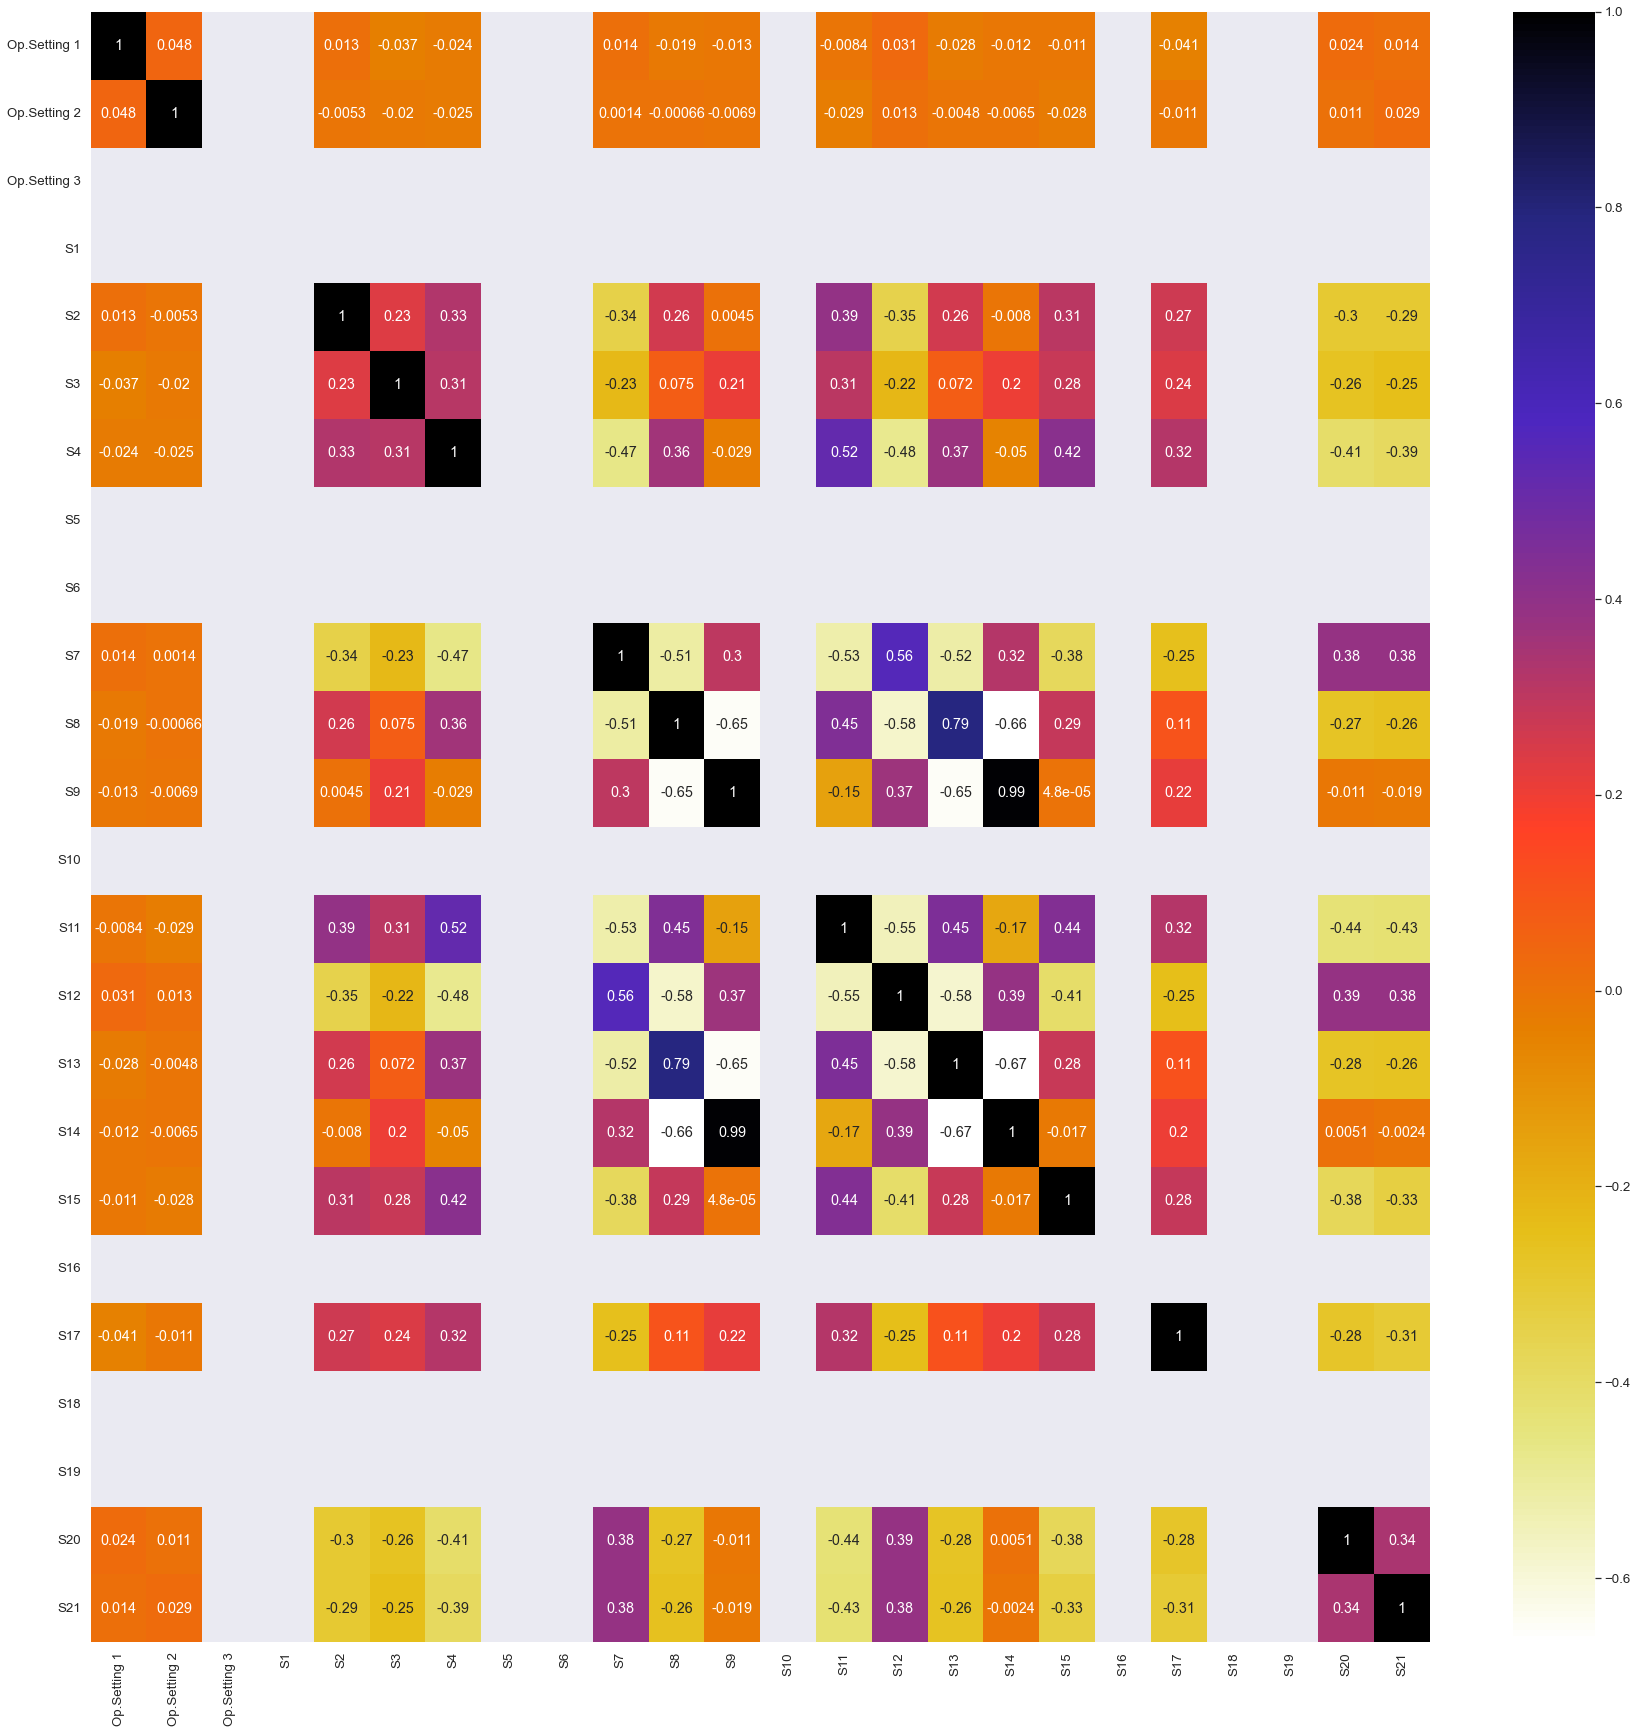

In [42]:
eng_train = pd.read_csv('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\CSV data files\Train_data_csv.csv')
eng_train = eng_train.groupby('Unit No.').tail(55)
eng_train = eng_train.drop(['Unit No.'], axis = 1)
eng_train = eng_train.drop(['Time in Cycles'], axis = 1)
eng_train = eng_train.astype(float)
cor2 = eng_train.corr()
cor2.to_excel('Last_15_corr.xlsx')
plt.figure(figsize=(30,30))
sns.heatmap(cor2, annot = True, cmap=plt.cm.CMRmap_r)
sns.set(font_scale=1.2)

In [44]:
corr_features = correlation(eng_train,0.8)
corr_features

{'S14'}